In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("bobblehead.csv")
df.head()

,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,2012,Baltimore Orioles,APR,6,46773,Friday,Minnesota Twins,59,Clear,Day,NO,NO,NO,NO
1,2012,Baltimore Orioles,APR,7,31532,Saturday,Minnesota Twins,63,Clear,Night,NO,NO,NO,NO
2,2012,Baltimore Orioles,APR,8,14738,Sunday,Minnesota Twins,68,Clear,Day,NO,NO,NO,NO
3,2012,Baltimore Orioles,APR,9,25478,Monday,New York Yankees,65,Cloudy,Night,NO,NO,NO,NO
4,2012,Baltimore Orioles,APR,10,24659,Tuesday,New York Yankees,62,Clear,Night,NO,NO,NO,NO


In [3]:
df_dodgers=df[df.home_team=='Los Angeles Dodgers']
df_dodgers.head()

,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
1615,2012,Los Angeles Dodgers,APR,10,56000,Tuesday,Pittsburgh Pirates,67,Clear,Day,NO,NO,NO,NO
1616,2012,Los Angeles Dodgers,APR,11,29729,Wednesday,Pittsburgh Pirates,58,Cloudy,Night,NO,NO,NO,NO
1617,2012,Los Angeles Dodgers,APR,12,28328,Thursday,Pittsburgh Pirates,57,Cloudy,Night,NO,NO,NO,NO
1618,2012,Los Angeles Dodgers,APR,13,31601,Friday,San Diego Padres,54,Cloudy,Night,NO,NO,YES,NO
1619,2012,Los Angeles Dodgers,APR,14,46549,Saturday,San Diego Padres,57,Cloudy,Night,NO,NO,NO,NO


1. ¿Cuántas veces tuvo lugar una promoción durante el año (caps vs shirts vs bobblehead vs Fireworks)?

In [4]:
e_cap=df_dodgers['cap'].describe()
porc=e_cap['freq']/e_cap['count']
print('En {} de {} juegos no se ofrecieron gorras, para un {:.2%}'.format(e_cap['freq'], e_cap['count'], porc))

e_shirt=df_dodgers['shirt'].describe()
porc=e_shirt['freq']/e_shirt['count']
print('En {} de {} juegos no se ofrecieron playeras, para un {:.2%}'.format(e_shirt['freq'], e_shirt['count'], porc))

e_bob=df_dodgers['bobblehead'].describe()
porc=e_bob['freq']/e_bob['count']
print('En {} de {} juegos no se ofrecieron bobbleheads, para un {:.2%}'.format(e_bob['freq'], e_bob['count'], porc))

e_fire=df_dodgers['fireworks'].describe()
porc=e_cap['freq']/e_fire['count']
print('En {} de {} juegos no se ofrecieron fuegos artificiales, para un {:.2%}'.format(e_fire['freq'], e_fire['count'], porc))

En 79 de 81 juegos no se ofrecieron gorras, para un 97.53%
En 78 de 81 juegos no se ofrecieron playeras, para un 96.30%
En 70 de 81 juegos no se ofrecieron bobbleheads, para un 86.42%
En 67 de 81 juegos no se ofrecieron fuegos artificiales, para un 97.53%


In [5]:
total_prom= e_cap['freq']+e_shirt['freq']+e_bob['freq']+e_fire['freq']
x=326-total_prom
print('Se ofrecieron {} promociones en el periodo de estudio'.format(x))

Se ofrecieron 32 promociones en el periodo de estudio


2. ¿Cómo varió la asistencia con y sin promociones?

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(total_prom)

294


In [7]:
cap_yes=df_dodgers[df_dodgers.cap=='YES']
shirt_yes=df_dodgers[df_dodgers.shirt=='YES']
bob_yes=df_dodgers[df_dodgers.bobblehead=='YES']
fire_yes=df_dodgers[df_dodgers.fireworks=='YES']
df_prom= pd.concat([cap_yes, shirt_yes, bob_yes, fire_yes])
df_prom

,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
1656,2012,Los Angeles Dodgers,JUL,3,33884,Tuesday,Cincinnati Reds,70,Cloudy,Night,YES,NO,NO,NO
1669,2012,Los Angeles Dodgers,AUG,5,42495,Sunday,Chicago Cubs,83,Clear,Day,YES,NO,NO,NO
1626,2012,Los Angeles Dodgers,APR,29,48753,Sunday,Washington Nationals,74,Clear,Day,NO,YES,NO,NO
1645,2012,Los Angeles Dodgers,JUN,11,50559,Monday,Los Angeles Angels,68,Clear,Night,NO,YES,NO,NO
1684,2012,Los Angeles Dodgers,SEP,4,40619,Tuesday,San Diego Padres,78,Clear,Night,NO,YES,NO,NO
1625,2012,Los Angeles Dodgers,APR,28,54242,Saturday,Washington Nationals,71,Clear,Night,NO,NO,NO,YES
1634,2012,Los Angeles Dodgers,MAY,15,47077,Tuesday,Arizona Diamondbacks,70,Clear,Night,NO,NO,NO,YES
1642,2012,Los Angeles Dodgers,MAY,29,51137,Tuesday,Milwaukee Brewers,74,Clear,Night,NO,NO,NO,YES
1646,2012,Los Angeles Dodgers,JUN,12,55279,Tuesday,Los Angeles Angels,66,Cloudy,Night,NO,NO,NO,YES
1651,2012,Los Angeles Dodgers,JUN,28,49006,Thursday,New York Mets,75,Clear,Night,NO,NO,NO,YES


In [8]:
df_prom.index

Int64Index([1656, 1669, 1626, 1645, 1684, 1625, 1634, 1642, 1646, 1651, 1654,
            1659, 1665, 1671, 1674, 1679, 1618, 1624, 1630, 1635, 1638, 1648,
            1652, 1657, 1658, 1667, 1676, 1680, 1687, 1690],
           dtype='int64')

In [9]:
df_pasprom=df_dodgers.drop([1656, 1669, 1626, 1645, 1684, 1625, 1634, 1642, 1646, 1651, 1654,
            1659, 1665, 1671, 1674, 1679, 1618, 1624, 1630, 1635, 1638, 1648,
            1652, 1657, 1658, 1667, 1676, 1680, 1687, 1690])
df_pasprom

,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
1615,2012,Los Angeles Dodgers,APR,10,56000,Tuesday,Pittsburgh Pirates,67,Clear,Day,NO,NO,NO,NO
1616,2012,Los Angeles Dodgers,APR,11,29729,Wednesday,Pittsburgh Pirates,58,Cloudy,Night,NO,NO,NO,NO
1617,2012,Los Angeles Dodgers,APR,12,28328,Thursday,Pittsburgh Pirates,57,Cloudy,Night,NO,NO,NO,NO
1619,2012,Los Angeles Dodgers,APR,14,46549,Saturday,San Diego Padres,57,Cloudy,Night,NO,NO,NO,NO
1620,2012,Los Angeles Dodgers,APR,15,38359,Sunday,San Diego Padres,65,Clear,Day,NO,NO,NO,NO
1621,2012,Los Angeles Dodgers,APR,23,26376,Monday,Atlanta Braves,60,Cloudy,Night,NO,NO,NO,NO
1622,2012,Los Angeles Dodgers,APR,24,44014,Tuesday,Atlanta Braves,63,Cloudy,Night,NO,NO,NO,NO
1623,2012,Los Angeles Dodgers,APR,25,26345,Wednesday,Atlanta Braves,64,Cloudy,Night,NO,NO,NO,NO
1627,2012,Los Angeles Dodgers,MAY,7,43713,Monday,San Francisco Giants,67,Clear,Night,NO,NO,NO,NO
1628,2012,Los Angeles Dodgers,MAY,8,32799,Tuesday,San Francisco Giants,75,Clear,Night,NO,NO,NO,NO


In [10]:
df_prom.describe()

,year,day,attend,temp
count,30.0,30.000000,30.000000,30.000000
mean,2012.0,17.433333,45866.366667,72.166667
std,0.0,10.112073,7502.807261,6.711202
min,2012.0,1.000000,31601.000000,54.000000
25%,2012.0,11.000000,40233.250000,68.500000
50%,2012.0,15.000000,45942.000000,73.500000
75%,2012.0,28.000000,53385.500000,75.750000
max,2012.0,31.000000,56000.000000,85.000000


In [11]:
df_pasprom.describe()

,year,day,attend,temp
count,51.0,51.000000,51.000000,51.000000
mean,2012.0,15.372549,38201.078431,73.725490
std,0.0,9.312273,7437.222312,9.145662
min,2012.0,1.000000,24312.000000,57.000000
25%,2012.0,8.000000,33423.000000,67.000000
50%,2012.0,15.000000,37084.000000,73.000000
75%,2012.0,23.500000,43401.500000,80.000000
max,2012.0,31.000000,56000.000000,95.000000


In [12]:
#La desviación estándar con promociones es de 7502 asistentes con promociones y de 7437 asistentes sin promociones, con una variación de 0.9% puede concluirse, en un primer análisis que ésta no es significativa 

3. ¿Qué patrones existen con la programación de los juegos (¿clima, hora, mes, día, etc.?

4. ¿Qué equipos contrincantes traen una asistencia mayor al promedio?

In [13]:
df_team=df_dodgers[['opponent', 'attend']]
df_team['opponent'].describe()
df_team['opponent'].unique()

array(['Pittsburgh Pirates', 'San Diego Padres', 'Atlanta Braves',
       'Washington Nationals', 'San Francisco Giants', 'Colorado Rockies',
       'Arizona Diamondbacks', 'St. Louis Cardinals', 'Houston Astros',
       'Milwaukee Brewers', 'Los Angeles Angels', 'Chicago White Sox',
       'New York Mets', 'Cincinnati Reds', 'Philadelphia Phillies',
       'Chicago Cubs', 'Miami Marlins'], dtype=object)

In [14]:
df_team.set_index('opponent').loc['San Francisco Giants', 'attend'].mean()

39296.333333333336

In [15]:
list_mean= (
    df_team.set_index('opponent').loc['San Francisco Giants', 'attend'].mean(),
    df_team.set_index('opponent').loc['Pittsburgh Pirates', 'attend'].mean(),
    df_team.set_index('opponent').loc['San Diego Padres', 'attend'].mean(),
    df_team.set_index('opponent').loc['Atlanta Braves', 'attend'].mean(),
    df_team.set_index('opponent').loc['Washington Nationals', 'attend'].mean(),
    df_team.set_index('opponent').loc['Colorado Rockies', 'attend'].mean(),
    df_team.set_index('opponent').loc['Arizona Diamondbacks', 'attend'].mean(),
    df_team.set_index('opponent').loc['St. Louis Cardinals', 'attend'].mean(),
    df_team.set_index('opponent').loc['Houston Astros', 'attend'].mean(),
    df_team.set_index('opponent').loc['Milwaukee Brewers', 'attend'].mean(),
    df_team.set_index('opponent').loc['Los Angeles Angels', 'attend'].mean(),
    df_team.set_index('opponent').loc['Chicago White Sox', 'attend'].mean(),
    df_team.set_index('opponent').loc['New York Mets', 'attend'].mean(),
    df_team.set_index('opponent').loc['Cincinnati Reds', 'attend'].mean(),
    df_team.set_index('opponent').loc['Philadelphia Phillies', 'attend'].mean(),
    df_team.set_index('opponent').loc['Chicago Cubs', 'attend'].mean(),
    df_team.set_index('opponent').loc['Miami Marlins', 'attend'].mean())
list_mean

(39296.333333333336,
 38019.0,
 42092.22222222222,
 32245.0,
 49267.333333333336,
 39631.22222222222,
 39315.444444444445,
 40853.28571428572,
 35383.333333333336,
 35358.75,
 49777.333333333336,
 46382.0,
 49586.25,
 40649.0,
 41897.0,
 44206.666666666664,
 40665.333333333336)

In [16]:
list_mean= ({
    df_team.set_index('opponent').loc['San Francisco Giants', 'attend'].mean(),
    df_team.set_index('opponent').loc['Pittsburgh Pirates', 'attend'].mean(),
    df_team.set_index('opponent').loc['San Diego Padres', 'attend'].mean(),
    df_team.set_index('opponent').loc['Atlanta Braves', 'attend'].mean(),
    df_team.set_index('opponent').loc['Washington Nationals', 'attend'].mean(),
    df_team.set_index('opponent').loc['Colorado Rockies', 'attend'].mean(),
    df_team.set_index('opponent').loc['Arizona Diamondbacks', 'attend'].mean(),
    df_team.set_index('opponent').loc['St. Louis Cardinals', 'attend'].mean(),
    df_team.set_index('opponent').loc['Houston Astros', 'attend'].mean(),
    df_team.set_index('opponent').loc['Milwaukee Brewers', 'attend'].mean(),
    df_team.set_index('opponent').loc['Los Angeles Angels', 'attend'].mean(),
    df_team.set_index('opponent').loc['Chicago White Sox', 'attend'].mean(),
    df_team.set_index('opponent').loc['New York Mets', 'attend'].mean(),
    df_team.set_index('opponent').loc['Cincinnati Reds', 'attend'].mean(),
    df_team.set_index('opponent').loc['Philadelphia Phillies', 'attend'].mean(),
    df_team.set_index('opponent').loc['Chicago Cubs', 'attend'].mean(),
    df_team.set_index('opponent').loc['Miami Marlins', 'attend'].mean()})
list_mean

{32245.0,
 35358.75,
 35383.333333333336,
 38019.0,
 39296.333333333336,
 39315.444444444445,
 39631.22222222222,
 40649.0,
 40665.333333333336,
 40853.28571428572,
 41897.0,
 42092.22222222222,
 44206.666666666664,
 46382.0,
 49267.333333333336,
 49586.25,
 49777.333333333336}

In [17]:
#Los equipos que aportan la mayor asistencia promedio son: Los Angeles Angels(49,977), New York Mets(49,586) y Washington Nationals (49,267)

Responda las siguientes preguntas usando técnicas de modelado predictivas:
1. ¿Las promociones de bobblehead (pb) incrementan la asistencia?

In [18]:
Q1 = df_dodgers['attend'].quantile(0.25)
Q3 = df_dodgers['attend'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

12095.0


In [19]:
outliers=(df_dodgers['attend'] < (Q1 - 1.5 * IQR)) |(df_dodgers['attend'] > (Q3 + 1.5 * IQR))
outliers.describe()   #No hay outliers 

count        81
unique        1
top       False
freq         81
Name: attend, dtype: object

In [20]:
yes_no=pd.get_dummies(df_dodgers,columns=['bobblehead'])
yes_no

,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead_NO,bobblehead_YES
1615,2012,Los Angeles Dodgers,APR,10,56000,Tuesday,Pittsburgh Pirates,67,Clear,Day,NO,NO,NO,1,0
1616,2012,Los Angeles Dodgers,APR,11,29729,Wednesday,Pittsburgh Pirates,58,Cloudy,Night,NO,NO,NO,1,0
1617,2012,Los Angeles Dodgers,APR,12,28328,Thursday,Pittsburgh Pirates,57,Cloudy,Night,NO,NO,NO,1,0
1618,2012,Los Angeles Dodgers,APR,13,31601,Friday,San Diego Padres,54,Cloudy,Night,NO,NO,YES,1,0
1619,2012,Los Angeles Dodgers,APR,14,46549,Saturday,San Diego Padres,57,Cloudy,Night,NO,NO,NO,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,2012,Los Angeles Dodgers,SEP,29,40724,Saturday,Colorado Rockies,84,Cloudy,Night,NO,NO,NO,1,0
1692,2012,Los Angeles Dodgers,SEP,30,35607,Sunday,Colorado Rockies,95,Clear,Day,NO,NO,NO,1,0
1693,2012,Los Angeles Dodgers,OCT,1,33624,Monday,San Francisco Giants,86,Clear,Night,NO,NO,NO,1,0
1694,2012,Los Angeles Dodgers,OCT,2,42473,Tuesday,San Francisco Giants,83,Clear,Night,NO,NO,NO,1,0


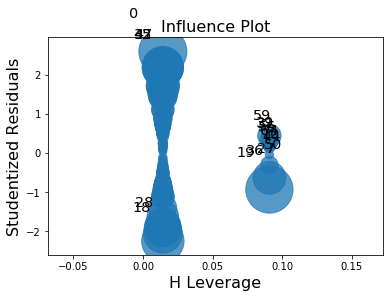

In [21]:
Y=np.array(yes_no['attend'])
X=np.array(yes_no['bobblehead_YES'])
X=sm.add_constant(X)
results = sm.OLS(Y, X).fit() # OLS: Ordinary Least Square 

sm.graphics.influence_plot(results)

plt.show()

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     40.44
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           1.22e-08
Time:                        21:19:02   Log-Likelihood:                -828.61
No. Observations:                  81   AIC:                             1661.
Df Residuals:                      79   BIC:                             1666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.914e+04    811.640     48.221      0.000    3.75e+04    4.08e+04
x1          1.401e+04   2202.467      6.360      0.000    9622.807    1.84e+04
==============================================================================
Omnibus:                        0.616   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.436
Skew:                           0.180   Prob(JB):                        0.804
Kurtosis:                       2.995   Cond. No.                         2.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Puede señalarse que la promoción de bobblehead es una variable significativa en la estimación de la asistencia, con un coeficiente significativo la asistencia varía en 14 mil personas cuando hay una promoción de bobblehad 

2. ¿Son mejores las pb que las otras?

In [24]:
yes_no2=pd.get_dummies(df_dodgers,columns=['shirt','cap','fireworks'])
yes_no2

,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,bobblehead,shirt_NO,shirt_YES,cap_NO,cap_YES,fireworks_NO,fireworks_YES
1615,2012,Los Angeles Dodgers,APR,10,56000,Tuesday,Pittsburgh Pirates,67,Clear,Day,NO,1,0,1,0,1,0
1616,2012,Los Angeles Dodgers,APR,11,29729,Wednesday,Pittsburgh Pirates,58,Cloudy,Night,NO,1,0,1,0,1,0
1617,2012,Los Angeles Dodgers,APR,12,28328,Thursday,Pittsburgh Pirates,57,Cloudy,Night,NO,1,0,1,0,1,0
1618,2012,Los Angeles Dodgers,APR,13,31601,Friday,San Diego Padres,54,Cloudy,Night,NO,1,0,1,0,0,1
1619,2012,Los Angeles Dodgers,APR,14,46549,Saturday,San Diego Padres,57,Cloudy,Night,NO,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,2012,Los Angeles Dodgers,SEP,29,40724,Saturday,Colorado Rockies,84,Cloudy,Night,NO,1,0,1,0,1,0
1692,2012,Los Angeles Dodgers,SEP,30,35607,Sunday,Colorado Rockies,95,Clear,Day,NO,1,0,1,0,1,0
1693,2012,Los Angeles Dodgers,OCT,1,33624,Monday,San Francisco Giants,86,Clear,Night,NO,1,0,1,0,1,0
1694,2012,Los Angeles Dodgers,OCT,2,42473,Tuesday,San Francisco Giants,83,Clear,Night,NO,1,0,1,0,1,0


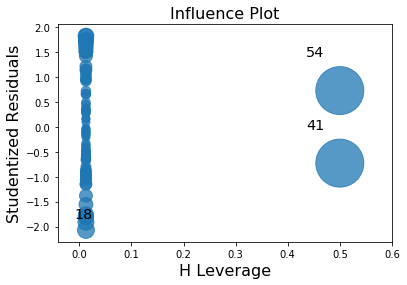

In [25]:
Y=np.array(yes_no2['attend'])
X=np.array(yes_no2['cap_YES'])
X=sm.add_constant(X)
results_cap = sm.OLS(Y, X).fit() # OLS: Ordinary Least Square 

sm.graphics.influence_plot(results_cap)

plt.show()

In [26]:
results_cap.summary()    #Cap no es significativa

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2397
Date:                Wed, 22 Jul 2020   Prob (F-statistic):              0.626
Time:                        21:19:02   Log-Likelihood:                -845.23
No. Observations:                  81   AIC:                             1694.
Df Residuals:                      79   BIC:                             1699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.111e+04    938.014     43.829      0.000    3.92e+04     4.3e+04
x1         -2922.7405   5969.484     -0.490      0.626   -1.48e+04    8959.221
==============================================================================
Omnibus:                        4.181   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                2.225
Skew:                           0.118   Prob(JB):                        0.329
Kurtosis:                       2.223   Cond. No.                         6.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

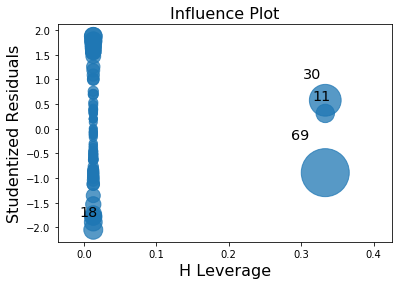

In [27]:
Y=np.array(yes_no2['attend'])
X=np.array(yes_no2['shirt_YES'])
X=sm.add_constant(X)
results_shirt = sm.OLS(Y, X).fit() # OLS: Ordinary Least Square 

sm.graphics.influence_plot(results_shirt)

plt.show()

In [28]:
results_shirt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.428
Date:                Wed, 22 Jul 2020   Prob (F-statistic):              0.236
Time:                        21:19:02   Log-Likelihood:                -844.63
No. Observations:                  81   AIC:                             1693.
Df Residuals:                      79   BIC:                             1698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.082e+04    937.006     43.569      0.000     3.9e+04    4.27e+04
x1          5819.1154   4868.824      1.195      0.236   -3872.036    1.55e+04
==============================================================================
Omnibus:                        3.430   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                2.169
Skew:                           0.184   Prob(JB):                        0.338
Kurtosis:                       2.288   Cond. No.                         5.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

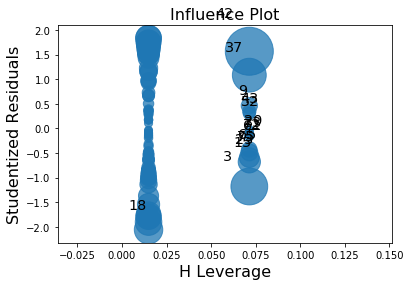

In [29]:
Y=np.array(yes_no2['attend'])
X=np.array(yes_no2['fireworks_YES'])
X=sm.add_constant(X)
results_fire = sm.OLS(Y, X).fit() # OLS: Ordinary Least Square 

sm.graphics.influence_plot(results_fire)

plt.show()

In [30]:
results_fire.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                 0.0003466
Date:                Wed, 22 Jul 2020   Prob (F-statistic):              0.985
Time:                        21:19:02   Log-Likelihood:                -845.35
No. Observations:                  81   AIC:                             1695.
Df Residuals:                      79   BIC:                             1699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.103e+04   1020.099     40.224      0.000     3.9e+04    4.31e+04
x1            45.6780   2453.697      0.019      0.985   -4838.283    4929.640
==============================================================================
Omnibus:                        4.328   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                2.311
Skew:                           0.137   Prob(JB):                        0.315
Kurtosis:                       2.219   Cond. No.                         2.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Las promociones de bobblehead son significativamente mejores que las otras tres, al tiempo que su coeficiente demostró ser significativo (y las demás no) y aportar un valor superior de R^2

3. Dadas sus predicciones, cuántos bubbleheads debieron ordenar para Jun-Ago?

In [31]:
df_jun=df_dodgers.loc[(df_dodgers.month=='JUN')]
df_jul=df_dodgers.loc[(df_dodgers.month=='JUL')] 
df_aug=df_dodgers.loc[(df_dodgers.month=='AUG')]
df_period=pd.concat([df_jun, df_jul, df_aug])
df_period

,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
1645,2012,Los Angeles Dodgers,JUN,11,50559,Monday,Los Angeles Angels,68,Clear,Night,NO,YES,NO,NO
1646,2012,Los Angeles Dodgers,JUN,12,55279,Tuesday,Los Angeles Angels,66,Cloudy,Night,NO,NO,NO,YES
1647,2012,Los Angeles Dodgers,JUN,13,43494,Wednesday,Los Angeles Angels,67,Clear,Night,NO,NO,NO,NO
1648,2012,Los Angeles Dodgers,JUN,15,40432,Friday,Chicago White Sox,67,Clear,Night,NO,NO,YES,NO
1649,2012,Los Angeles Dodgers,JUN,16,45210,Saturday,Chicago White Sox,68,Clear,Night,NO,NO,NO,NO
1650,2012,Los Angeles Dodgers,JUN,17,53504,Sunday,Chicago White Sox,74,Clear,Day,NO,NO,NO,NO
1651,2012,Los Angeles Dodgers,JUN,28,49006,Thursday,New York Mets,75,Clear,Night,NO,NO,NO,YES
1652,2012,Los Angeles Dodgers,JUN,29,49763,Friday,New York Mets,72,Clear,Night,NO,NO,YES,NO
1653,2012,Los Angeles Dodgers,JUN,30,44217,Saturday,New York Mets,78,Clear,Day,NO,NO,NO,NO
1654,2012,Los Angeles Dodgers,JUL,1,55359,Sunday,New York Mets,75,Clear,Night,NO,NO,NO,YES


In [32]:
#Número de partidos con Bobblehead=Yes: 8 
compras= 14010*8
compras  
#Debieron comprarse alrededor de 112,080 bobbleheads

112080